# Plotly Scatter

### Introduction

In this lesson, we'll move through styling our Scatter plots.

### Economist data

In [71]:
import pandas as pd
url = "./economist_tv.csv"
df_drama = pd.read_csv(url, index_col = 0)

In [98]:
df_drama[:2]

,titleId,seasonNumber,title,date,av_rating,share,genres
0,tt2879552,1,11.22.63,2016-03-10,8.4890,0.51,"Drama,Mystery,Sci-Fi"
1,tt3148266,1,12 Monkeys,2015-02-27,8.3407,0.46,"Adventure,Drama,Mystery"


In [83]:
df_drama_dated = df_drama.assign(date = pd.to_datetime(df_drama['date']))

In [127]:
year = df_drama_dated['date'].dt.year

df_drama_year = df_drama_dated.assign(year = year)

In [145]:
year_rating = df_drama_year.groupby('year').median(numeric_only = True)['av_rating']
# 

In [133]:
sampled_dramas = df_drama.sample(500, random_state = 2)

In [134]:
share = sampled_dramas['share']
share.iloc[:2]

2162    0.17
2197    0.11
Name: share, dtype: float64

* Produce the following plot

<img src="./scatter-economist.png">

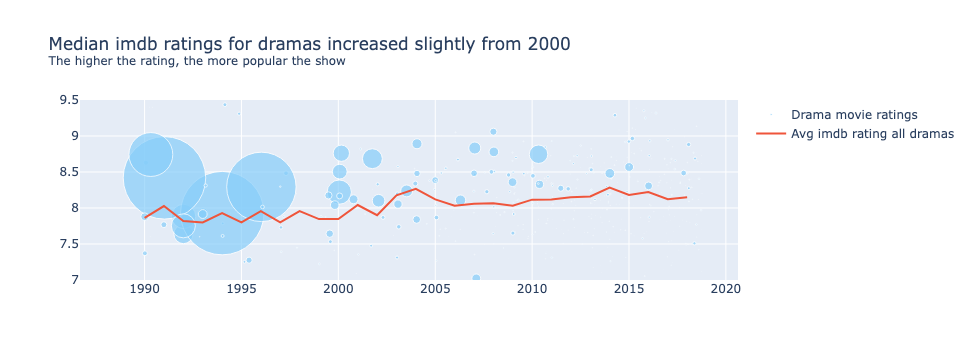

In [160]:
drama_dates = sampled_dramas['date']
drama_avg_rating = sampled_dramas['av_rating']
titles = sampled_dramas['title']

import plotly.graph_objects as go
title = '<span>Median imdb ratings for dramas increased slightly from 2000 <br><sup>The higher the rating, the more popular the show</sup></span>'
layout = go.Layout(yaxis = {'range': [7, 9.5]}, title = title)
drama_scatter = go.Scatter(x = drama_dates, y = drama_avg_rating,
                           mode = 'markers', text = titles, name = 'Drama movie ratings', marker=dict(
            color='LightSkyBlue',
            size=share*1.5))
avg_plot = go.Scatter(x = year_rating.index, y = year_rating.values, name = 'Avg imdb rating all dramas')
go.Figure(data = [drama_scatter, avg_plot], layout = layout)

### Initial Scatter plots

[Beautiful Scatter](https://towardsdatascience.com/a-quick-guide-to-beautiful-scatter-plots-in-python-75625ae67396)